In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Prevent MKL memory leak warning on Windows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

# Optional: suppress only the specific warning message if you want cleaner output
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('CustomerData.csv')

In [3]:
# Step 2: Explore the data
print(data.head())
print(data.columns)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [4]:
# Step 3: Select relevant features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [5]:
# Step 4: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

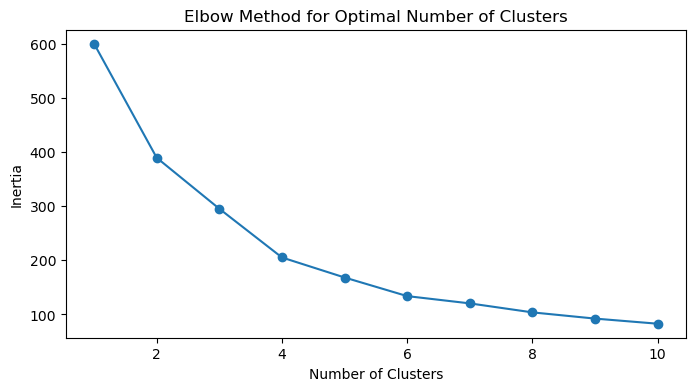

In [6]:
# Step 5: Elbow method to find optimal clusters
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Explicit n_init to suppress warning
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [7]:
# Step 6: Train KMeans with chosen clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # Explicit n_init
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [8]:
# Step 7: Add cluster labels to data
data['Cluster'] = kmeans.labels_

# Silhouette score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.4039582785148566


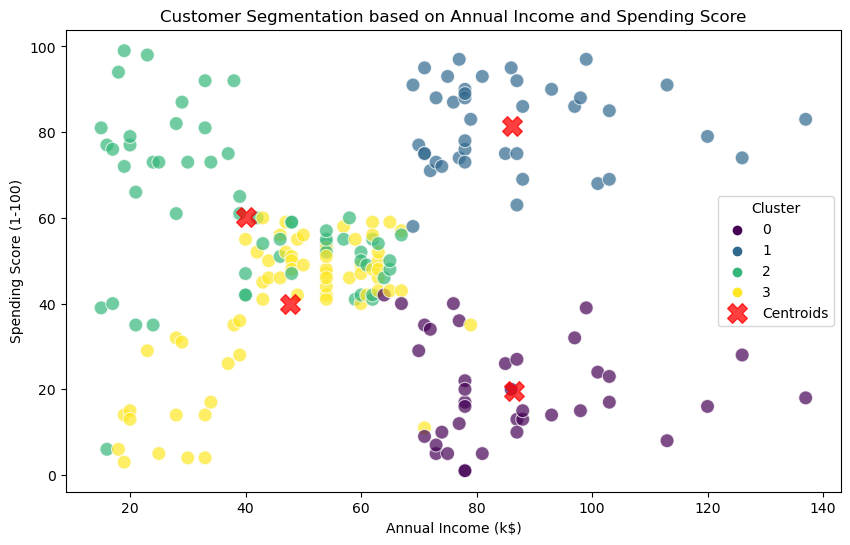

In [9]:
# Step 8: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.7
)

# Plot cluster centroids (inverse scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()